https://facebook.github.io/prophet/docs/installation.html#python    
https://github.com/ranaroussi/yfinance

In [1]:
!python -m pip install prophet
# conda install -c conda-forge prophet
!pip3 install yfinance -q --no-warn-script-location
# !conda install -c conda-forge yfinance
# !conda install conda-forge::yfinance

# conda install -c conda-forge frozendict

In [2]:
!pip3 install yfinance

In [3]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt

c:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# 台積電股票
yahoo = yf.Ticker("2330.TW").history(period="max")
yahoo.head()

Open       High        Low      Close  \
Date                                                                    
2000-01-04 00:00:00+08:00  33.538116  33.538116  32.972872  33.538116   
2000-01-05 00:00:00+08:00  33.538103  34.291702  33.161213  34.291702   
2000-01-06 00:00:00+08:00  34.103361  34.291716  33.538116  33.538116   
2000-01-07 00:00:00+08:00  32.407627  32.972871  32.030737  32.595982   
2000-01-10 00:00:00+08:00  33.538112  33.914822  32.972868  33.726467   

                                 Volume  Dividends  Stock Splits  
Date                                                              
2000-01-04 00:00:00+08:00  200662336736        0.0           0.0  
2000-01-05 00:00:00+08:00  402466805912        0.0           0.0  
2000-01-06 00:00:00+08:00  197545715802        0.0           0.0  
2000-01-07 00:00:00+08:00  235270344752        0.0           0.0  
2000-01-10 00:00:00+08:00  276171685539        0.0           0.0

<Axes: xlabel='Date'>

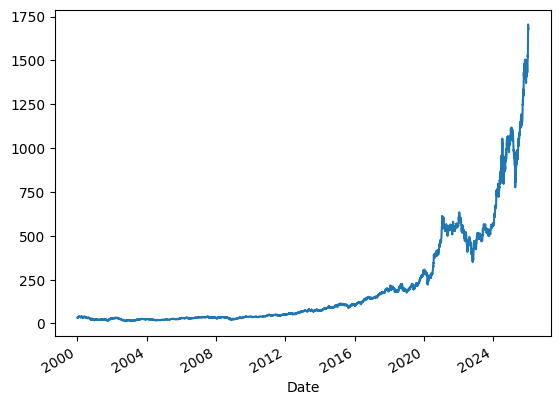

In [5]:
yahoo['Close'].plot()

In [6]:
yahoo.reset_index(inplace=True, drop=False)

In [7]:
yahoo.tail()

Date    Open    High     Low   Close    Volume  \
6470 2026-01-05 00:00:00+08:00  1630.0  1695.0  1625.0  1670.0  66871820   
6471 2026-01-06 00:00:00+08:00  1645.0  1705.0  1645.0  1705.0  46751692   
6472 2026-01-07 00:00:00+08:00  1665.0  1685.0  1665.0  1675.0  49857449   
6473 2026-01-08 00:00:00+08:00  1660.0  1700.0  1655.0  1685.0  29215618   
6474 2026-01-09 00:00:00+08:00  1665.0  1700.0  1655.0  1680.0  37387656   

      Dividends  Stock Splits  
6470        0.0           0.0  
6471        0.0           0.0  
6472        0.0           0.0  
6473        0.0           0.0  
6474        0.0           0.0

In [8]:
df = yahoo[['Date', 'Close']].set_axis(['ds', 'y'], axis='columns')

In [9]:
df.head()

ds          y
0 2000-01-04 00:00:00+08:00  33.538116
1 2000-01-05 00:00:00+08:00  34.291702
2 2000-01-06 00:00:00+08:00  33.538116
3 2000-01-07 00:00:00+08:00  32.595982
4 2000-01-10 00:00:00+08:00  33.726467

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6475 entries, 0 to 6474
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                      
---  ------  --------------  -----                      
 0   ds      6475 non-null   datetime64[ns, Asia/Taipei]
 1   y       6475 non-null   float64                    
dtypes: datetime64[ns, Asia/Taipei](1), float64(1)
memory usage: 101.3 KB


In [11]:
df['ds'] = df['ds'].dt.tz_localize(None)

# 1. Basic

In [12]:
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    
)
m.fit(df)

15:28:13 - cmdstanpy - INFO - Chain [1] start processing
15:28:13 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=30)
future.tail()

ds
6500 2026-02-04
6501 2026-02-05
6502 2026-02-06
6503 2026-02-07
6504 2026-02-08

In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
6500 2026-02-04  1117.506628  1027.887085  1217.786701
6501 2026-02-05  1118.006226  1027.478940  1213.466347
6502 2026-02-06  1118.533338  1022.527656  1213.678862
6503 2026-02-07  1119.080439  1027.938198  1226.366823
6504 2026-02-08  1119.639682  1025.949227  1217.297376

In [15]:
%pip install -U plotly

Note: you may need to restart the kernel to use updated packages.


In [17]:
import sys
!{sys.executable} -m pip install -U nbformat



   ------------- -------------------------- 2/6 [referencing]
   -------------------------- ------------- 4/6 [jsonschema]
   -------------------------- ------------- 4/6 [jsonschema]
   -------------------------- ------------- 4/6 [jsonschema]
   --------------------------------- ------ 5/6 [nbformat]
   --------------------------------- ------ 5/6 [nbformat]
   ---------------------------------------- 6/6 [nbformat]



In [18]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
                          '2000-01-06T00:00:00.000000000', ..., '2026-01-07T00:00:00.000000000',
                          '2026-01-08T00:00:00.000000000', '2026-01-09T00:00:00.000000000'],
                         shape=(6475,), dtype='datetime64[ns]'),
              'y': {'bdata': ('AAAAAOHEQEAAAACAViVBQAAAAADhxE' ... 'AAACyaQAAAAAAAVJpAAAAAAABAmkA='),
                    'dtype': 'f8'}},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
                          '2000-01-06T00:00:00.000000000', ..., '2026-02-06T00:00:00.000000000',
                          '2026-02-07T00:00:00.000000000', '2026-02-08T00:00:00.000000000'],
                         shape=(6505,), dtype='datetime64[ns]'),
              'y': {'bdata': ('L8FPYAfWScBP0MfwT0hKwNkIve5+4U' ... 'GjOPSPQMYLFrfAD5BAMTQXAswHkEA='),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
                          '2000-01-06T00:00:00.000000000', ..., '2026-02-06T00:00:00.000000000',
                          '2026-02-07T00:00:00.000000000', '2026-02-08T00:00:00.000000000'],
                         shape=(6505,), dtype='datetime64[ns]'),
              'y': {'bdata': ('ykXfSEBZRUCQxZETrllFQEHwN5k5Uk' ... 'UjInqRQNB0fF5SfJFAk9SzCI9+kUA='),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
                          '2000-01-06T00:00:00.000000000', ..., '2026-02-06T00:00:00.000000000',
                          '2026-02-07T00:00:00.000000000', '2026-02-08T00:00:00.000000000'],
                         shape=(6505,), dtype='datetime64[ns]'),
              'y': {'bdata': ('d1fXJsilYEBv4kjBixhgQJkDInw0S2' ... 'Qnt/aSQPygb6B3KZNARWNhgzAFk0A='),
                    'dtype': 'f8'}}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'ds'},
                         'type': 'date'},
               'yaxis': {'title': {'text': 'y'}}}
})

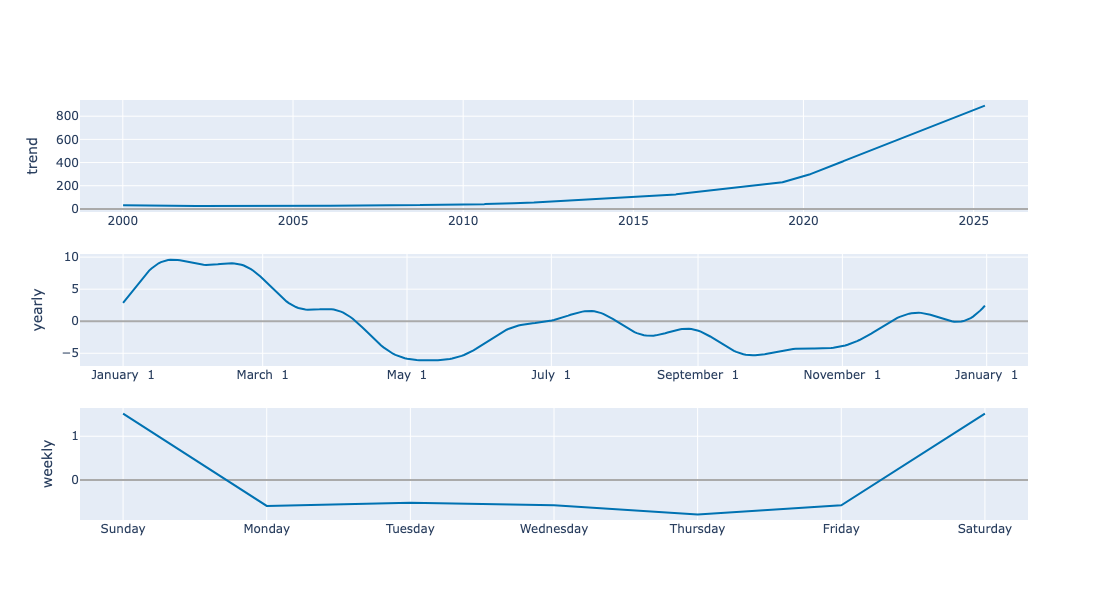

In [16]:
plot_components_plotly(m, forecast)

# 2. Change point (轉折點)

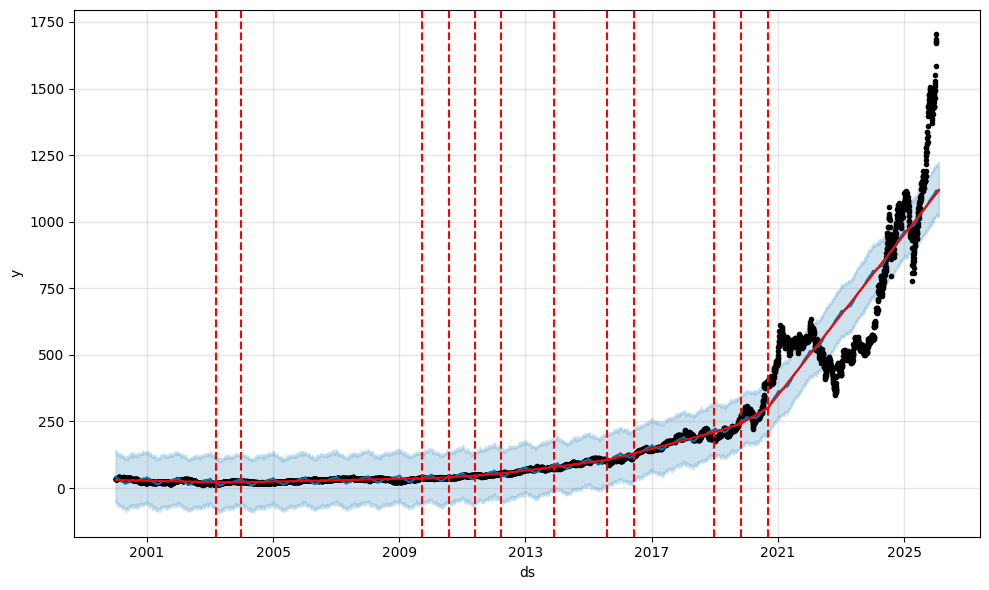

In [19]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# 3. Holiday

## 3.1 Built-in Country Holidays

In [20]:
m = Prophet()
m.add_country_holidays(country_name='CN')
m.fit(df)

15:29:53 - cmdstanpy - INFO - Chain [1] start processing
15:29:56 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
m.train_holiday_names

0                             New Year's Day
1         Chinese New Year (Spring Festival)
2                                  Labor Day
3                               National Day
4                  New Year's Day (observed)
                       ...                  
182    Day off (substituted from 02/14/2026)
183    Day off (substituted from 02/28/2026)
184    Day off (substituted from 05/09/2026)
185    Day off (substituted from 09/20/2026)
186    Day off (substituted from 10/10/2026)
Length: 187, dtype: object

In [22]:
forecast = m.predict(future)
plot_components_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
                          '2000-01-06T00:00:00.000000000', ..., '2026-02-06T00:00:00.000000000',
                          '2026-02-07T00:00:00.000000000', '2026-02-08T00:00:00.000000000'],
                         shape=(6505,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('rkxTX3F0PkCs4sCWhXI+QKx4Ls6ZcD' ... 'PWn3GRQNK5i8BFc5FA41H0qut0kUA='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'holidays',
              'text': array(['', '', '', ..., '', '', ''], shape=(6505,), dtype=object),
              'type': 'scatter',
              'x': array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
                          '2000-01-06T00:00:00.000000000', ..., '2026-02-06T00:00:00.000000000',
                          '2026-02-07T00:00:00.000000000', '2026-02-08T00:00:00.000000000'],
                         shape=(6505,), dtype='datetime64[ns]'),
              'xaxis': 'x2',
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAA='),
                    'dtype': 'f8'},
              'yaxis': 'y2'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:59.178082304',
                          '2017-01-03T00:01:58.356164352', ..., '2017-12-29T05:57:02.465753344',
                          '2017-12-30T05:58:01.643835648', '2017-12-31T05:59:00.821917696'],
                         shape=(365,), dtype='datetime64[ns]'),
              'xaxis': 'x3',
              'y': {'bdata': ('4tDTQXLdJkALrd+zlh4nQNX1rQAhSy' ... 'hOuSVAtJMYQO0nJkDrOyo/SoomQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y3'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'weekly',
              'type': 'scatter',
              'x': array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
                          '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
                          '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
                          '2017-01-07T00:00:00.000000000'], dtype='datetime64[ns]'),
              'xaxis': 'x4',
              'y': {'bdata': 'vteyQDNz+D+XCyZutyPyv5VEZY/62OO/rhk/qLUY27/St8SqOmLGv8fMiRN6h+a/NeNSPjNz+D8=',
                    'dtype': 'f8'},
              'yaxis': 'y4'}],
    'layout': {'height': 800,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'range': [1998-09-14 09:36:00, 2027-05-30 14:24:00],
                         'type': 'date'},
               'xaxis2': {'anchor': 'y2',
                          'domain': [0.0, 1.0],
                          'range': [1998-09-14 09:36:00, 2027-05-30 14:24:00],
                          'type': 'date'},
               'xaxis3': {'anchor': 'y3',
                          'domain': [0.0, 1.0],
                          'range': [2016-12-13 18:54:02.958904115, 2018-01-18
                                    11:04:57.863013581],
                          'tickformat': '%B %e',
                          'type': 'date'},
               'xaxis4': {'anchor': 'y4',
                          'domain': [0.0, 1.0],
                          'range': [2016-12-31 16:48:00, 2017-01-07 07:12:00],
                          'tickformat': '%A',
                  

## 3.2 Special Events (總統選舉時間)

In [23]:
election = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2000-03-18', '2004-03-20', '2008-03-22',
                        '2012-01-14', '2016-01-16', '2020-01-11']),
  'lower_window': 0,
  'upper_window': 1,
})
# upper_window和lower_window分別指特殊日期的影響上下限。

In [ ]:
m = Prophet(
    holidays=election)
m.fit(df)

17:33:33 - cmdstanpy - INFO - Chain [1] start processing
17:33:35 - cmdstanpy - INFO - Chain [1] done processing


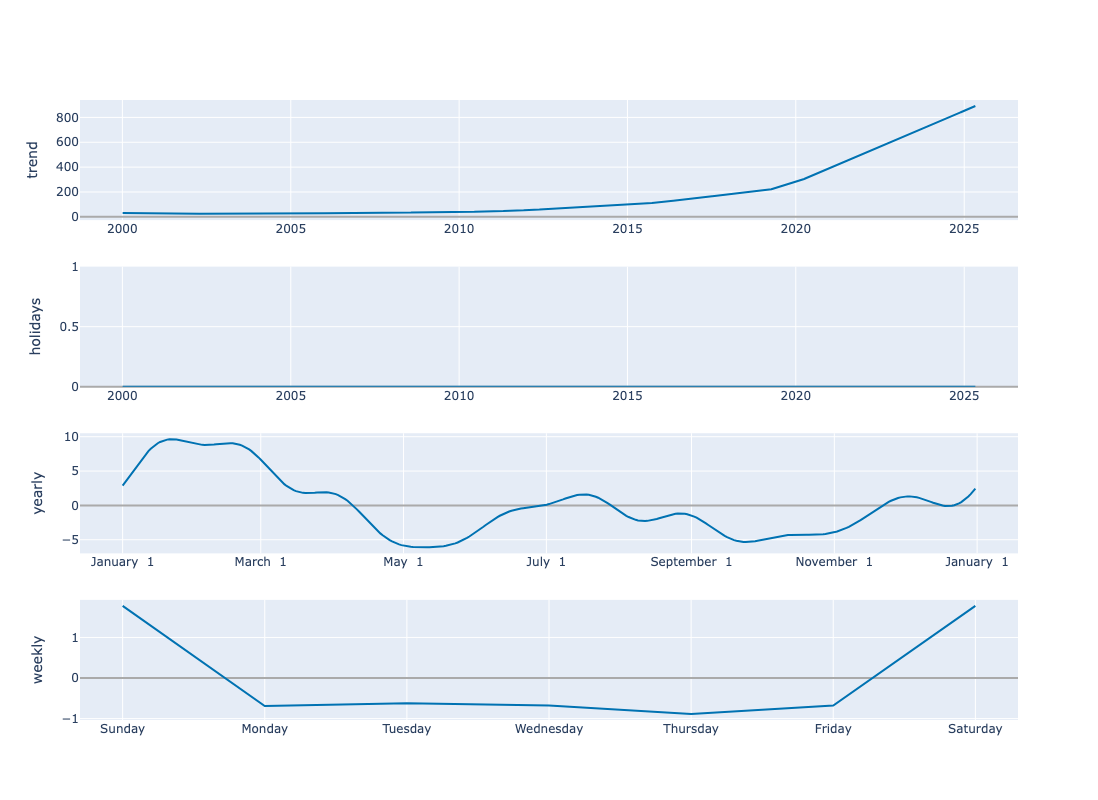

In [23]:
forecast = m.predict(future)
plot_components_plotly(m, forecast)

## 3.3 Treating COVID-19 lockdowns as a one-off holidays

In [28]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-21             0 2020-06-06            77
1  lockdown_2 2020-07-09             0 2020-10-27           110
2  lockdown_3 2021-02-13             0 2021-02-17             4
3  lockdown_4 2021-05-28             0 2021-06-10            13

In [29]:
m2 = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    holidays=lockdowns)
m2 = m2.fit(df)
future2 = m2.make_future_dataframe(periods=366)
forecast2 = m2.predict(future2)

15:33:53 - cmdstanpy - INFO - Chain [1] start processing
15:33:57 - cmdstanpy - INFO - Chain [1] done processing


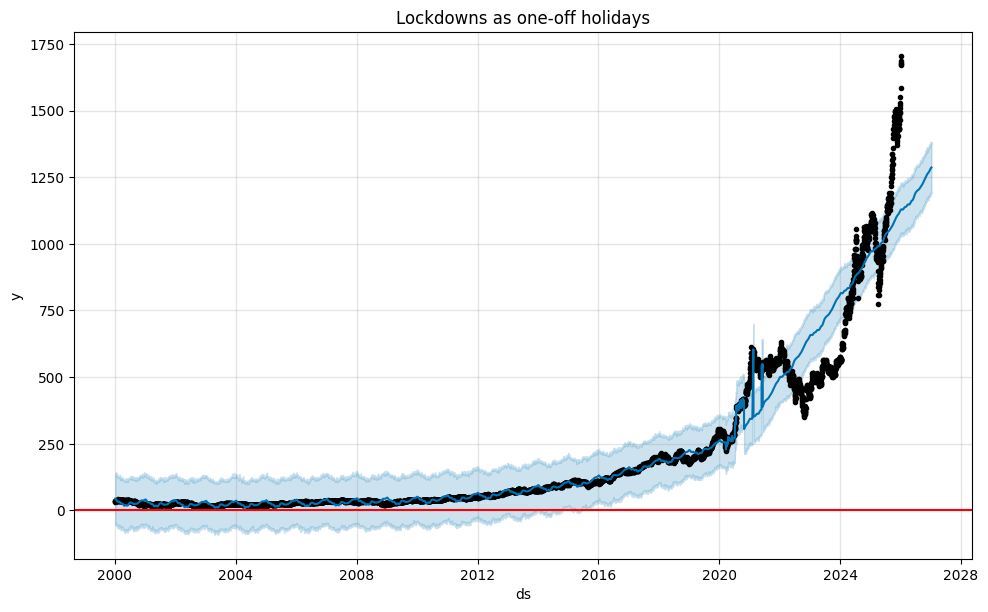

In [30]:
m2.plot(forecast2)
plt.axhline(y=0, color='red')
plt.title('Lockdowns as one-off holidays');

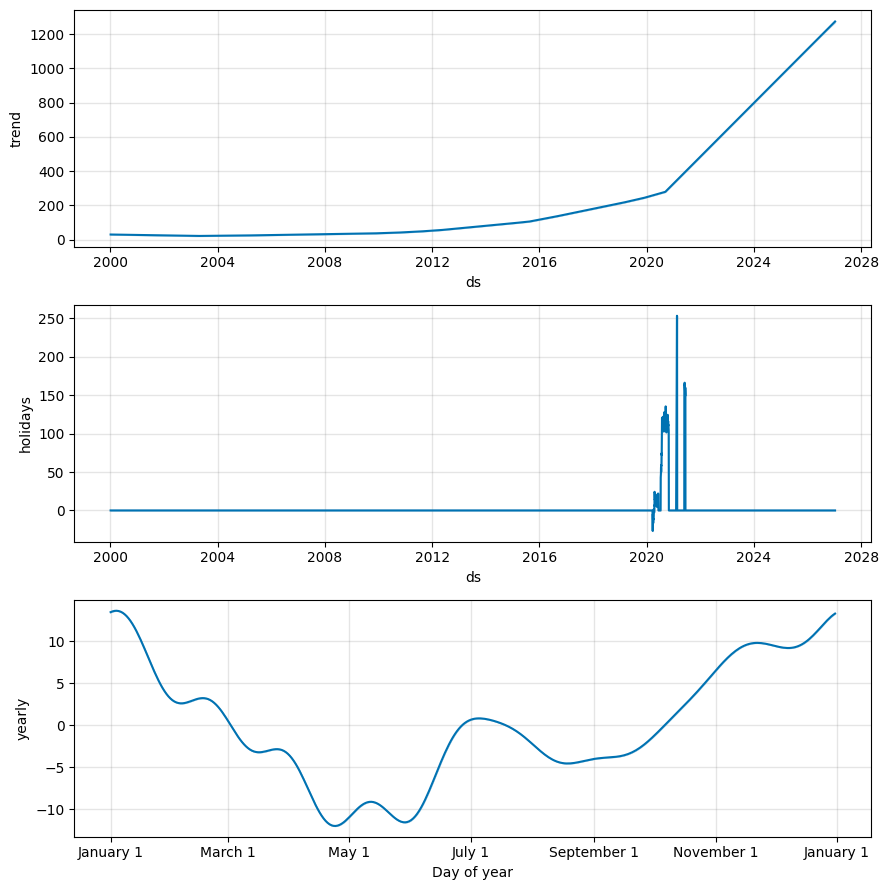

In [27]:
m2.plot_components(forecast2);

# 請你根據你想研究的股票指數進行時間序列的分析

如：
* S&P 500 指數: ^GSPC
* NASDAQ 指數: ^IXIC